<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/Semi_Supervised%20/Co_Training_%E2%80%94_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9F%D0%BE%D0%BB%D1%83%D0%9D%D0%B0%D0%B4%D0%B7%D0%BE%D1%80%D0%BD%D0%BE%D0%B3%D0%BE_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Training — Метод ПолуНадзорного Обучения



### 1. Введение

Co-Training — это метод полунадзорного обучения, предложенный в 1998 году Блейром и Митчеллом. Он предназначен для ситуаций, когда доступен небольшой объем помеченных данных и большой объем непомеченных данных. Основная идея заключается в использовании двух различных представлений данных для построения двух моделей, которые затем "обучаются" друг от друга.

В данной лекции мы углубимся в математические аспекты Co-Training, включая формализацию алгоритма, анализ его работы и доказательства корректности.



### 2. Формальная Постановка Проблемы

#### 2.1. Нотации
Пусть:
- $ D = \{x_1, x_2, ..., x_n\} $ — набор объектов.
- Каждый объект $ x_i $ может быть представлен двумя независимыми подмножествами признаков:
  $$
  x_i = (x_i^A, x_i^B),
  $$
  где $ x_i^A $ и $ x_i^B $ — различные представления одного и того же объекта.
- $ L = \{(x_i, y_i)\}_{i=1}^m $ — множество помеченных данных, где $ y_i \in \{-1, +1\} $ — метка класса.
- $ U = \{x_i\}_{i=m+1}^n $ — множество непомеченных данных.

Цель: обучить две модели $ h_A $ и $ h_B $, которые работают с представлениями $ A $ и $ B $ соответственно, используя как помеченные, так и непомеченные данные.



### 3. Алгоритм Co-Training

#### 3.1. Шаги Алгоритма

1. **Инициализация**:
   - Обучите модель $ h_A $ на подмножестве данных $ L $, используя только представление $ A $ ($ x_i^A $).
   - Обучите модель $ h_B $ на подмножестве данных $ L $, используя только представление $ B $ ($ x_i^B $).

2. **Выбор наиболее уверенных примеров**:
   - Для каждого объекта $ x_i \in U $, вычислите вероятность принадлежности к положительному классу:
     $$
     p_A(x_i) = P(y_i = +1 | x_i^A), \quad p_B(x_i) = P(y_i = +1 | x_i^B).
     $$
   - Выберите $ k $ объектов из $ U $, для которых модель $ h_A $ или $ h_B $ показала наибольшую уверенность в своих предсказаниях. Уверенность можно оценить как:
     $$
     \text{Уверенность}(h_A, x_i) = |p_A(x_i) - 0.5|,
     $$
     то есть разница между вероятностью и порогом 0.5.

3. **Обмен знаниями**:
   - Если модель $ h_A $ сделала надежное предсказание для объекта $ x_i $, добавьте этот объект с его предсказанной меткой в обучающую выборку для $ h_B $:
     $$
     L_B \gets L_B \cup \{(x_i^B, \hat{y}_i)\},
     $$
     где $ \hat{y}_i = \text{sign}(p_A(x_i) - 0.5) $.
   - Аналогично, если модель $ h_B $ сделала надежное предсказание для объекта $ x_i $, добавьте этот объект с его предсказанной меткой в обучающую выборку для $ h_A $.

4. **Переобучение**:
   - Переобучите $ h_A $ на обновленной выборке $ L_A $.
   - Переобучите $ h_B $ на обновленной выборке $ L_B $.

5. **Повторение**:
   - Повторяйте шаги 2–4 до тех пор, пока не достигнете определенного критерия остановки (например, максимального числа итераций или достижения стабильности моделей).



### 4. Математическая Формализация

#### 4.1. Предположения

Для корректной работы Co-Training необходимо выполнение следующих ключевых предположений:



##### **1. Независимость представлений**

Представления $ A $ и $ B $ должны быть условно независимыми при заданном классе $ y_i $. Это означает, что вероятность совместного появления $ x_i^A $ и $ x_i^B $ для объекта с меткой $ y_i $ равна произведению вероятностей их появления по отдельности:
$$
P(x_i^A, x_i^B | y_i) = P(x_i^A | y_i) \cdot P(x_i^B | y_i).
$$

Это предположение важно, так как оно гарантирует, что информация, содержащаяся в $ x_i^A $, не дублирует информацию из $ x_i^B $. Если бы представления были сильно зависимы, то модели $ h_A $ и $ h_B $ могли бы предоставлять практически одинаковые прогнозы, что уменьшило бы эффективность метода.

**Пример:**
- В задаче текстовой классификации:
  - $ x_i^A $: мешок слов (bag-of-words), представляющий содержание документа.
  - $ x_i^B $: метаданные (например, автор, категория публикации, время выпуска).
  Эти два представления обычно являются независимыми: контент документа мало связан с его метаданными.

**Формальная интерпретация:**
Независимость представлений позволяет каждой модели ($ h_A $ или $ h_B $) обучаться на уникальных аспектах данных, что увеличивает разнообразие информации, используемой для обучения.



##### **2. Существование хорошего разделителя**

Должны существовать такие функции $ h_A $ и $ h_B $, которые могут правильно классифицировать данные на основе своих представлений. Формально, это означает, что существует пара гипотез $ h_A^* $ и $ h_B^* $, таких что:
$$
h_A^*(x_i^A) = y_i \quad \text{и} \quad h_B^*(x_i^B) = y_i,
$$
для всех объектов $ x_i $ с меткой $ y_i $.

Это предположение гарантирует, что каждое представление содержит достаточную информацию для правильной классификации данных. Без этого условия Co-Training может не сходиться к оптимальному решению.

**Пример:**
- В задаче распознавания лиц:
  - $ x_i^A $: цветовые характеристики лица.
  - $ x_i^B $: геометрические характеристики (расположение глаз, носа и т.д.).
  Если хотя бы одно из этих представлений не содержит достаточной информации для классификации, качество модели будет снижаться.



#### 4.2. Теоретическое Обоснование

Blum и Mitchell (1998) доказали следующую теорему:

**Теорема**: Если выполняются предположения о независимости представлений и существовании хорошего разделителя, то Co-Training сходится к оптимальному решению при увеличении количества итераций.



##### **Доказательство**

Рассмотрим детальный процесс доказательства:



**Шаг 1: Выбор наиболее уверенных примеров**

На каждой итерации модели $ h_A $ и $ h_B $ выбирают наиболее уверенные примеры из непомеченных данных. Уверенность можно оценить через вероятность предсказания класса:
$$
\text{Уверенность}(h_A, x_i) = |P(y_i = +1 | x_i^A) - P(y_i = -1 | x_i^A)|.
$$
Аналогично для $ h_B $.

Выбор наиболее уверенных примеров минимизирует риск добавления шумовых данных в обучающую выборку другой модели. Это важный момент, так как добавление неверных меток может привести к деградации качества моделей.



**Шаг 2: Добавление новых примеров**

Наиболее уверенные примеры добавляются в обучающую выборку другой модели. Например:
- Если модель $ h_A $ сделала надежное предсказание для объекта $ x_i $, то этот объект с предсказанной меткой добавляется в обучающую выборку для $ h_B $:
  $$
  L_B \gets L_B \cup \{(x_i^B, \hat{y}_i)\},
  $$
  где $ \hat{y}_i = \text{sign}(P(y_i = +1 | x_i^A) - 0.5) $.

Аналогично для $ h_B $.



**Шаг 3: Использование независимых представлений**

Поскольку представления $ A $ и $ B $ независимы, каждая модель предоставляет уникальную информацию. Это означает, что даже если одна модель ошибается на некотором объекте, другая модель может компенсировать эту ошибку, используя свою собственную информацию.

**Математически:**
Если $ h_A $ ошибается на объекте $ x_i $, но $ h_B $ делает правильное предсказание, то вероятность того, что обе модели одновременно ошибаются, минимальна, благодаря независимости представлений:
$$
P(h_A(x_i^A) \neq y_i \text{ и } h_B(x_i^B) \neq y_i) = P(h_A(x_i^A) \neq y_i) \cdot P(h_B(x_i^B) \neq y_i).
$$



**Шаг 4: Сходимость к оптимальному решению**

Процесс продолжается до тех пор, пока новые примеры не становятся менее информативными. Поскольку на каждой итерации модели "обогащаются" новыми данными, они постепенно приближаются к оптимальным решениям $ h_A^* $ и $ h_B^* $.

**Критерий остановки:**
- Остановка происходит, когда добавляемые примеры перестают значительно улучшать качество моделей.
- Можно также использовать максимальное число итераций или достижение заданного уровня точности.



**Интерпретация сходимости:**
Сходимость достигается за счет:
1. Постепенного расширения обучающей выборки за счет непомеченных данных.
2. Компенсации ошибок одной модели другой моделью благодаря независимости представлений.
3. Минимизации риска добавления шумовых данных за счет выбора наиболее уверенных примеров.



#### 4.3. Пример Математического Анализа

Рассмотрим простой пример с двумя моделями $ h_A $ и $ h_B $, работающими на бинарной классификации. Пусть:
- $ P(h_A(x_i^A) \neq y_i) = \epsilon_A $ — вероятность ошибки $ h_A $.
- $ P(h_B(x_i^B) \neq y_i) = \epsilon_B $ — вероятность ошибки $ h_B $.

Тогда общая вероятность ошибки двух моделей можно оценить как:
$$
P(\text{Общая ошибка}) = P(h_A \neq y_i \text{ и } h_B \neq y_i) = \epsilon_A \cdot \epsilon_B.
$$

Если $ \epsilon_A $ и $ \epsilon_B $ малы, то общая вероятность ошибки также будет малой, благодаря независимости представлений.





### 5. Анализ Сходимости

#### 5.1. Измерение Уверенности
Уверенность модели $ h_A $ для объекта $ x_i $ можно оценить как:
$$
\text{Уверенность}(h_A, x_i) = |P(y_i = +1 | x_i^A) - P(y_i = -1 | x_i^A)|.
$$
Аналогично для $ h_B $.

Чем выше уверенность, тем более вероятно, что предсказание модели является правильным.

#### 5.2. Риск Замкнутого Цикла
Если модели $ h_A $ и $ h_B $ делают ошибочные предсказания, эти ошибки могут распространяться между моделями, создавая замкнутый цикл. Чтобы минимизировать этот риск:
- Используйте только наиболее уверенные примеры.
- Ограничьте количество итераций.



### 6. Примеры Применения

#### 6.1. Текстовая Классификация
Допустим, мы хотим классифицировать документы на темы "спорт" и "политика". Мы можем использовать:
- Представление $ A $: Содержание документа (текст).
- Представление $ B $: Метаданные (например, автор, источник, время публикации).

Мы обучаем две модели: одну на содержании текста, другую на метаданных. Затем модели обмениваются наиболее уверенными предсказаниями для непомеченных документов.

#### 6.2. Распознавание Изображений
Для задачи распознавания лиц можно использовать:
- Представление $ A $: Цветовые характеристики изображения.
- Представление $ B $: Геометрические характеристики (например, расположение глаз, носа).

Каждая модель обучается на своем представлении, а затем они обмениваются предсказаниями для улучшения результатов.



### 7. Современные Развития

#### 7.1. Deep Co-Training
В контексте глубокого обучения Co-Training может быть адаптирован для использования нейронных сетей. Например:
- Представление $ A $: Выходы сверточного слоя для изображений.
- Представление $ B $: Выходы полносвязного слоя.

Две нейронные сети обучают друг друга, используя аналогичный процесс обмена знаниями.

#### 7.2. Tri-Training
Tri-Training — это расширение Co-Training, где используется три модели вместо двух. Каждая модель обучается на собственной выборке и делится своими наиболее уверенными предсказаниями с другими моделями.



### 8. Преимущества и Недостатки

#### Преимущества:
1. Эффективное использование непомеченных данных.
2. Простота реализации.
3. Гибкость: можно использовать различные алгоритмы для каждой модели.

#### Недостатки:
1. Зависимость от предположения о независимости представлений.
2. Чувствительность к шуму.
3. Необходимость разделения признаков.








Давайте рассмотрим конкретный числовой пример для Co-Training, чтобы лучше понять его работу. Предположим, что у нас есть задача бинарной классификации с небольшим объемом помеченных данных и большим объемом непомеченных данных.



### **Пример: Классификация документов**

#### **1. Данные**
У нас есть набор из 100 документов:
- Помеченные данные ($ L $): 20 документов.
- Непомеченные данные ($ U $): 80 документов.

Каждый документ представлен двумя представлениями:
- $ x_i^A $: мешок слов (bag-of-words), представляющий содержание документа.
- $ x_i^B $: метаданные (например, автор, категория публикации).

Метки классов:
- $ y_i = +1 $: документ относится к категории "спорт".
- $ y_i = -1 $: документ относится к категории "политика".


#### **2. Инициализация моделей**
Мы обучаем две модели:
- Модель $ h_A $ на представлении $ A $ (мешок слов).
- Модель $ h_B $ на представлении $ B $ (метаданные).

Предположим, что после обучения на помеченных данных ($ L $):
- $ h_A $ имеет точность 85% на тестовой выборке.
- $ h_B $ имеет точность 80% на тестовой выборке.



#### **3. Выбор наиболее уверенных примеров**
На каждой итерации мы выбираем $ k = 5 $ наиболее уверенных примеров из непомеченных данных ($ U $).

##### **Шаг 1: Предсказания для непомеченных данных**
Для каждого объекта $ x_i \in U $, вычислим вероятности принадлежности к положительному классу:
$$
p_A(x_i) = P(y_i = +1 | x_i^A), \quad p_B(x_i) = P(y_i = +1 | x_i^B).
$$

Предположим, что для первых 10 документов в $ U $ получены следующие вероятности:

| Документ | $ p_A(x_i) $ | $ p_B(x_i) $ |
|----------|---------------|---------------|
| 1        | 0.95          | 0.60          |
| 2        | 0.70          | 0.90          |
| 3        | 0.98          | 0.55          |
| 4        | 0.65          | 0.85          |
| 5        | 0.85          | 0.40          |
| 6        | 0.55          | 0.95          |
| 7        | 0.92          | 0.70          |
| 8        | 0.40          | 0.80          |
| 9        | 0.80          | 0.98          |
| 10       | 0.60          | 0.50          |

##### **Шаг 2: Оценка уверенности**
Уверенность для каждой модели можно оценить как:
$$
\text{Уверенность}(h_A, x_i) = |p_A(x_i) - 0.5|,
$$
$$
\text{Уверенность}(h_B, x_i) = |p_B(x_i) - 0.5|.
$$

Вычислим уверенность для каждого документа:

| Документ | $ \text{Уверенность}(h_A, x_i) $ | $ \text{Уверенность}(h_B, x_i) $ |
|----------|-----------------------------------|-----------------------------------|
| 1        | 0.45                              | 0.10                              |
| 2        | 0.20                              | 0.40                              |
| 3        | 0.48                              | 0.05                              |
| 4        | 0.15                              | 0.35                              |
| 5        | 0.35                              | 0.10                              |
| 6        | 0.05                              | 0.45                              |
| 7        | 0.42                              | 0.20                              |
| 8        | 0.10                              | 0.30                              |
| 9        | 0.30                              | 0.48                              |
| 10       | 0.10                              | 0.00                              |

##### **Шаг 3: Выбор $ k = 5 $ наиболее уверенных примеров**
Выберем по 5 наиболее уверенных примеров для каждой модели:
- Для $ h_A $: документы 3, 1, 7, 5, 2.
- Для $ h_B $: документы 9, 6, 2, 4, 8.



#### **4. Обмен знаниями**
Добавим выбранные примеры в обучающую выборку другой модели:
- Если $ h_A $ сделала надежное предсказание для документа $ x_i $, добавим $ (x_i^B, \hat{y}_i) $ в обучающую выборку для $ h_B $.
- Если $ h_B $ сделала надежное предсказание для документа $ x_i $, добавим $ (x_i^A, \hat{y}_i) $ в обучающую выборку для $ h_A $.

Например:
- Для документа 3 ($ h_A $): добавим $ (x_3^B, +1) $ в обучающую выборку для $ h_B $.
- Для документа 9 ($ h_B $): добавим $ (x_9^A, +1) $ в обучающую выборку для $ h_A $.


#### **5. Переобучение моделей**
Переобучим $ h_A $ и $ h_B $ на обновленных обучающих выборках.



#### **6. Повторение**
Повторяем шаги 3–5 до тех пор, пока не достигнем критерия остановки (например, максимального числа итераций или стабилизации качества моделей).


### **Результат**
После нескольких итераций модели $ h_A $ и $ h_B $ могут достичь более высокой точности благодаря использованию информации из непомеченных данных. Например:
- Точность $ h_A $ может увеличиться с 85% до 90%.
- Точность $ h_B $ может увеличиться с 80% до 87%.

Это происходит за счет:
1. Использования уникальной информации из каждого представления.
2. Минимизации риска добавления шумовых данных за счет выбора наиболее уверенных примеров.





Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


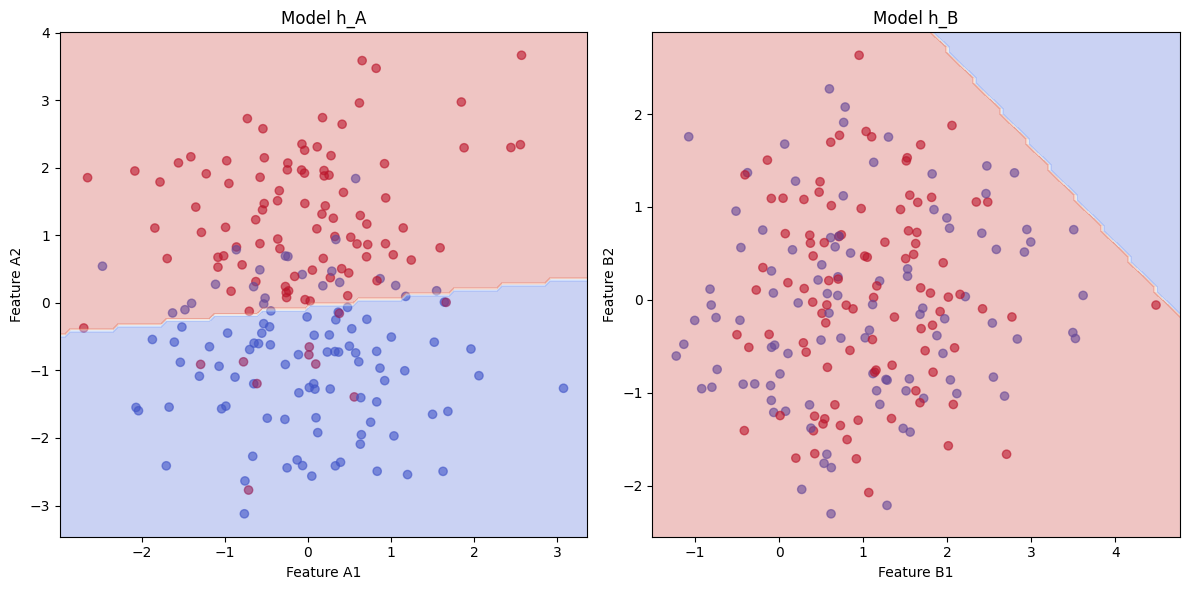

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Генерация данных
def generate_data():
    X, y = make_classification(
        n_samples=200, n_features=4, n_informative=2, n_redundant=0,
        n_clusters_per_class=1, random_state=42
    )
    # Разделение признаков на два представления A и B
    X_A = X[:, :2]  # Первые два признака
    X_B = X[:, 2:]  # Последние два признака
    return X_A, X_B, y

# Функция для выбора наиболее уверенных примеров
def select_confident_samples(model, X_unlabeled, confidence_threshold=0.8):
    probs = model.predict_proba(X_unlabeled)[:, 1]
    confidence = np.abs(probs - 0.5)
    indices = np.argsort(-confidence)[:5]  # Выбираем 5 самых уверенных примеров
    selected_X = X_unlabeled[indices]
    selected_y = (probs[indices] > 0.5).astype(int) * 2 - 1  # Конвертируем в {-1, +1}
    return selected_X, selected_y

# Основной алгоритм Co-Training
def co_training(X_A, X_B, y, num_iterations=10):
    # Разделение данных на помеченные и непомеченные
    X_A_labeled, X_A_unlabeled, y_labeled, _ = train_test_split(X_A, y, test_size=0.8, random_state=42)
    X_B_labeled, X_B_unlabeled, _, _ = train_test_split(X_B, y, test_size=0.8, random_state=42)

    # Инициализация моделей
    h_A = LogisticRegression()
    h_B = LogisticRegression()

    # Обучение начальных моделей
    h_A.fit(X_A_labeled, y_labeled)
    h_B.fit(X_B_labeled, y_labeled)

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}")

        # Модель h_A выбирает примеры для h_B
        if len(X_A_unlabeled) > 0:
            selected_X_B, selected_y_B = select_confident_samples(h_A, X_A_unlabeled)
            if len(selected_X_B) > 0:
                X_B_labeled = np.vstack([X_B_labeled, selected_X_B])
                y_labeled = np.hstack([y_labeled, selected_y_B])

                # Удаление выбранных примеров из непомеченных данных
                mask_A = np.isin(X_A_unlabeled, selected_X_B[:, :2], invert=True).all(axis=1)
                X_A_unlabeled = X_A_unlabeled[mask_A]

        # Модель h_B выбирает примеры для h_A
        if len(X_B_unlabeled) > 0:
            selected_X_A, selected_y_A = select_confident_samples(h_B, X_B_unlabeled)
            if len(selected_X_A) > 0:
                X_A_labeled = np.vstack([X_A_labeled, selected_X_A])
                y_labeled = np.hstack([y_labeled, selected_y_A])

                # Удаление выбранных примеров из непомеченных данных
                mask_B = np.isin(X_B_unlabeled, selected_X_A[:, :2], invert=True).all(axis=1)
                X_B_unlabeled = X_B_unlabeled[mask_B]

        # Переобучение моделей
        if len(X_A_labeled) == len(y_labeled):  # Проверка согласованности размеров
            h_A.fit(X_A_labeled, y_labeled)
        if len(X_B_labeled) == len(y_labeled):  # Проверка согласованности размеров
            h_B.fit(X_B_labeled, y_labeled)

    return h_A, h_B

# Визуализация результатов
def visualize_results(X_A, X_B, y, h_A, h_B):
    plt.figure(figsize=(12, 6))

    # Визуализация данных и границы решения для h_A
    plt.subplot(1, 2, 1)
    plt.scatter(X_A[:, 0], X_A[:, 1], c=y, cmap='coolwarm', alpha=0.6)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = h_A.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.title("Model h_A")
    plt.xlabel("Feature A1")
    plt.ylabel("Feature A2")

    # Визуализация данных и границы решения для h_B
    plt.subplot(1, 2, 2)
    plt.scatter(X_B[:, 0], X_B[:, 1], c=y, cmap='coolwarm', alpha=0.6)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = h_B.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.title("Model h_B")
    plt.xlabel("Feature B1")
    plt.ylabel("Feature B2")

    plt.tight_layout()
    plt.show()

# Главная функция
if __name__ == "__main__":
    # Генерация данных
    X_A, X_B, y = generate_data()

    # Запуск Co-Training
    h_A, h_B = co_training(X_A, X_B, y, num_iterations=10)

    # Визуализация результатов
    visualize_results(X_A, X_B, y, h_A, h_B)